In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
customer = pd.read_excel('p1-customers.xlsx', index_col=0)

In [3]:
mailing = pd.read_excel('p1-mailinglist.xlsx', index_col=0)


In [4]:
customer.head()

,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
Name,,,,,,,,,,,
Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [ ]:
customer.describe()

In [ ]:
customer.info()

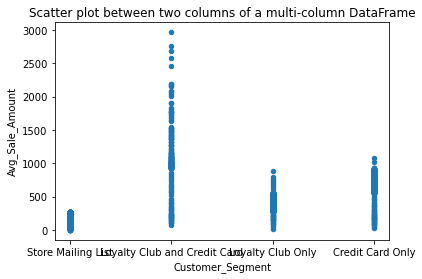

In [6]:

customer.plot.scatter(x='Customer_Segment', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);

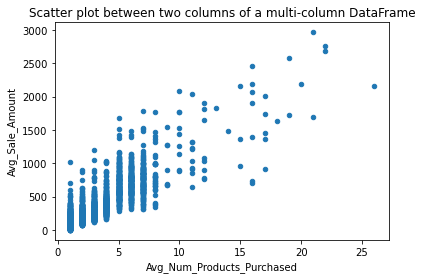

In [5]:
customer.plot.scatter(x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);

In [ ]:
customer.plot.scatter(x='#_Years_as_Customer', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);


In [ ]:
# Correlation matrix to statistically figure out multiple colinearity and variable that doesn't correlate with the target.
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(customer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
#plt.savefig('correlation_marix.png')

From the above, only one feature(Avg_Num_Products_Purchased) correlates with the target (Avg_sale_amount). Hence, our problem reduces into a simple linear regression with one independent variable and one dependent variable.

In [4]:
X = customer['Avg_Num_Products_Purchased'].values.reshape(-1,1)

In [33]:
mailing.head(2)

,Customer_Segment,Coefficient_Estimate_Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Avg_num_Coefficient,#_Years_as_Customer,Score_No,Score_Yes,Unnamed: 14,Average Sale Amount,Expected Revenue,Profit
Name,,,,,,,,,,,,,,,,,
A Giametti,0,-149.78,2213.0,5326 S Lisbon Way,Centennial,CO,80015.0,105.0,3.0,66.84,0.2,0.694964,0.305036,NaN,365.90,111.612602,49.306301
Abby Pierson,0,282.46,2785.0,4344 W Roanoke Pl,Denver,CO,80236.0,101.0,6.0,66.84,0.6,0.527275,0.472725,NaN,998.66,472.091086,229.545543


In [35]:
y = customer['Avg_Sale_Amount'].values

In [36]:
y_test = mailing['Average Sale Amount'].values

In [ ]:
min_max_scaler = StandardScaler()

In [7]:
X_train = min_max_scaler.fit_transform(X)

NameError: name 'min_max_scaler' is not defined

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression()

In [ ]:
X_test = min_max_scaler.transform(X_test)

In [ ]:
mailing.head()

In [ ]:
mailing.info()

In [ ]:
customer.isnull().any()

In [ ]:
mailing.isnull().any()

In [ ]:

sns.distplot(mailing.Avg_Num_Products_Purchased)

In [38]:
1
mailing['Avg_Num_Products_Purchased'] = mailing['Avg_Num_Products_Purchased'].fillna(mailing['Avg_Num_Products_Purchased'].mode()[0])

In [ ]:
sns.distplot(mailing['Average Sale Amount'])

In [39]:
1
mailing['Average Sale Amount'] = mailing['Average Sale Amount'].fillna(mailing['Average Sale Amount'].mode()[0])

In [40]:
1
mailing['City'] = mailing['City'].fillna(mailing['City'].mode()[0])

In [41]:
1
mailing['#_Years_as_Customer'] = mailing['#_Years_as_Customer'].fillna(mailing['#_Years_as_Customer'].mode()[0])

In [13]:
X_test, y_test = mailing['Avg_Num_Products_Purchased'].values.reshape(-1,1), mailing['Average Sale Amount'].values

In [ ]:
X_test = min_max_scaler.transform(X_test)

In [14]:
y_pred = model.predict(X_test)

In [15]:
R_squared = r2_score(y_test, y_pred)
print(f'Done.\nR-squared: {R_squared}')

Done.
R-squared: -0.0029893580655901975


In [ ]:
y_pred

In [ ]:
!pip install category_encoders

In [18]:
customer.tail()

,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
Name,,,,,,,,,,,
Joan Delisa,1,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
Helen Cordiner,1,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
Angela Finley,1,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
Christine Sullivan,1,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7
Elissa Engledow,1,3315,9360 E Center Ave,Denver,CO,80247,167.59,104,No,1,3


In [16]:
customer['Customer_Segment'] = np.where(customer['Customer_Segment'].str.contains('Credit Card Only'), 1,0)

In [42]:
mailing['Customer_Segment'] = np.where(mailing['Customer_Segment'].str.contains('Credit Card Only'), 1,0)

AttributeError: Can only use .str accessor with string values!

In [22]:
X = customer[['Customer_Segment', 'City', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]

In [43]:
X_test = mailing[['Customer_Segment', 'City', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]

In [44]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols="City")
X = encoder.fit_transform(X)

C:\Users\SUNNY\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


KeyError: 'City'

In [45]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols="City")
X_test = encoder.fit_transform(X_test)

In [24]:
X.head()

,Customer_Segment,City_0,City_1,City_2,City_3,City_4,City_5,Avg_Num_Products_Purchased,#_Years_as_Customer
Name,,,,,,,,,
Pamela Wright,0,0,0,0,0,0,1,1,6
Danell Valdez,0,0,0,0,0,1,0,1,6
Jessica Rinehart,0,0,0,0,0,1,1,1,3
Nancy Clark,0,0,0,0,0,0,1,1,6
Andrea Brun,0,0,0,0,0,0,1,1,2


In [46]:
model.fit(X, y)

LinearRegression()

In [51]:
model.score(X_test,y_test).round(3)

-0.002